# Off-the-shelf image classification with ConvNeXt models on TF-Hub

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/sayakpaul/ConvNeXt-TF/blob/main/notebooks/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/sayakpaul/ConvNeXt-TF/blob/main/notebooks/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://tfhub.dev/sayakpaul/collections/convnext/1"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub models</a>
  </td>
</table>

## Setup

In [1]:
!wget https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt

--2022-11-22 14:25:28--  https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21675 (21K) [text/plain]
Saving to: ‘ilsvrc2012_wordnet_lemmas.txt’

ilsvrc2012_wordnet_ 100%[===================>]  21.17K  --.-KB/s    in 0s      

2022-11-22 14:25:28 (85.9 MB/s) - ‘ilsvrc2012_wordnet_lemmas.txt’ saved [21675/21675]



In [2]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras


from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np
import requests

## Select a ConvNeXt ImageNet-1k model

In [3]:
model_name = "convnext_base_1k_224" #@param ["convnext_tiny_1k_224", "convnext_small_1k_224", "convnext_base_1k_224", "convnext_base_1k_384", "convnext_large_1k_224", "convnext_large_1k_384", "convnext_base_21k_1k_224", "convnext_base_21k_1k_384", "convnext_large_21k_1k_224", "convnext_large_21k_1k_384", "convnext_xlarge_21k_1k_224", "convnext_xlarge_21k_1k_384"]

model_handle_map ={
    "convnext_tiny_1k_224": "https://tfhub.dev/sayakpaul/convnext_tiny_1k_224/1",
    "convnext_small_1k_224": "https://tfhub.dev/sayakpaul/convnext_small_1k_224/1",
    "convnext_base_1k_224": "https://tfhub.dev/sayakpaul/convnext_base_1k_224/1",
    "convnext_base_1k_384": "https://tfhub.dev/sayakpaul/convnext_base_1k_384/1",
    "convnext_large_1k_224": "https://tfhub.dev/sayakpaul/convnext_large_1k_224/1",
    "convnext_large_1k_384": "https://tfhub.dev/sayakpaul/convnext_large_1k_384/1",
    "convnext_base_21k_1k_224": "https://tfhub.dev/sayakpaul/convnext_base_21k_1k_224/1",
    "convnext_base_21k_1k_384": "https://tfhub.dev/sayakpaul/convnext_base_21k_1k_384/1",
    "convnext_large_21k_1k_224": "https://tfhub.dev/sayakpaul/convnext_large_21k_1k_224/1",
    "convnext_large_21k_1k_384": "https://tfhub.dev/sayakpaul/convnext_large_21k_1k_384/1",
    "convnext_xlarge_21k_1k_224": "https://tfhub.dev/sayakpaul/convnext_xlarge_21k_1k_224/1",
    "convnext_xlarge_21k_1k_384": "https://tfhub.dev/sayakpaul/convnext_xlarge_21k_1k_384/1",

}

input_resolution = int(model_name.split("_")[-1])
model_handle = model_handle_map[model_name]
print(f"Input resolution: {input_resolution} x {input_resolution} x 3.")
print(f"TF-Hub handle: {model_handle}.")

Input resolution: 224 x 224 x 3.
TF-Hub handle: https://tfhub.dev/sayakpaul/convnext_base_1k_224/1.


## Image preprocessing utilities 

In [4]:
crop_layer = keras.layers.CenterCrop(224, 224)
norm_layer = keras.layers.Normalization(
    mean=[0.485 * 255, 0.456 * 255, 0.406 * 255],
    variance=[(0.229 * 255) ** 2, (0.224 * 255) ** 2, (0.225 * 255) ** 2],
)


def preprocess_image(image, size=input_resolution):
    image = np.array(image)
    image_resized = tf.expand_dims(image, 0)
    
    if size == 224:
        image_resized = tf.image.resize(image_resized, (256, 256), method="bicubic")
        image_resized = crop_layer(image_resized)
    elif size == 384:
        image_resized = tf.image.resize(image, (size, size), method="bicubic")
    
    return norm_layer(image_resized).numpy()
    

def load_image_from_url(url):
    # Credit: Willi Gierke
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    preprocessed_image = preprocess_image(image)
    return image, preprocessed_image

## Load ImageNet-1k labels and a demo image

In [6]:
!wget https://p0.pikrepo.com/preview/853/907/close-up-photo-of-gray-elephant.jpg

--2022-11-22 14:26:53--  https://p0.pikrepo.com/preview/853/907/close-up-photo-of-gray-elephant.jpg
Resolving p0.pikrepo.com (p0.pikrepo.com)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3120::, ...
Connecting to p0.pikrepo.com (p0.pikrepo.com)|188.114.96.0|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-11-22 14:26:54 ERROR 404: Not Found.



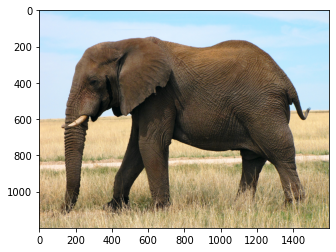

In [7]:
with open("ilsvrc2012_wordnet_lemmas.txt", "r") as f:
    lines = f.readlines()
imagenet_int_to_str = [line.rstrip() for line in lines]

img_url = "https://4.bp.blogspot.com/-qaAMrrfNUOM/Ue5b_EukW5I/AAAAAAAAPCQ/KLvtII0a4d4/s1600/abe4.jpg"
image, preprocessed_image = load_image_from_url(img_url)

plt.imshow(image)
plt.show()

## Run inference

In [8]:
classification_model = tf.keras.Sequential(
    [hub.KerasLayer(model_handle)]
)  
predictions = classification_model.predict(preprocessed_image)
predicted_label = imagenet_int_to_str[int(np.argmax(predictions))]
print(predicted_label)

1/1 [==============================] - 9s 9s/step
African_elephant, Loxodonta_africana
